In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Data Collection and Processing** 


In [65]:
data = pd.read_csv('/content/drive/MyDrive/data/gold_price.csv')

In [66]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [67]:
data.tail()


,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
4676,2019-08-27,1531.85,1532.95,1250.91,1247.51,1378.97,1380.88
4677,2019-08-28,1541.75,1537.15,1263.31,1258.77,1389.89,1387.43
4678,2019-08-29,1536.65,1540.20,1260.51,1262.96,1387.29,1392.03
4679,2019-08-30,1526.55,1528.40,1253.14,1251.15,1382.75,1383.51
4680,2019-09-02,1523.35,1525.95,1260.42,1265.01,1388.69,1391.51


In [68]:
# number of rows and columns
data.shape


(4681, 7)

In [69]:
# getting some basic informations about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4681 non-null   object 
 1   USD (AM)   4681 non-null   float64
 2   USD (PM)   4681 non-null   float64
 3   GBP (AM)   4681 non-null   float64
 4   GBP (PM)   4681 non-null   float64
 5   EURO (AM)  4681 non-null   float64
 6   EURO (PM)  4681 non-null   float64
dtypes: float64(6), object(1)
memory usage: 256.1+ KB


In [70]:
# checking the number of missing values
data.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

In [71]:
# getting the statistical measures of the data
data.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4681.000000,4681.000000,4681.000000,4681.000000,4681.000000,4681.000000
mean,960.176811,959.877590,625.178971,625.016988,774.060372,773.948817
std,449.587174,449.419618,324.589024,324.513514,351.655676,351.660739
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.100000,448.650000,244.558000,244.483000,361.367000,361.404000
50%,1113.250000,1112.750000,717.411000,716.297000,875.887000,875.310000
75%,1293.900000,1294.300000,939.094000,939.270000,1086.041000,1085.825000
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


# **Correlation:**
# **1. Positive Correlation**
# **2. Negative Correlation**

In [72]:
correlation = data.corr()

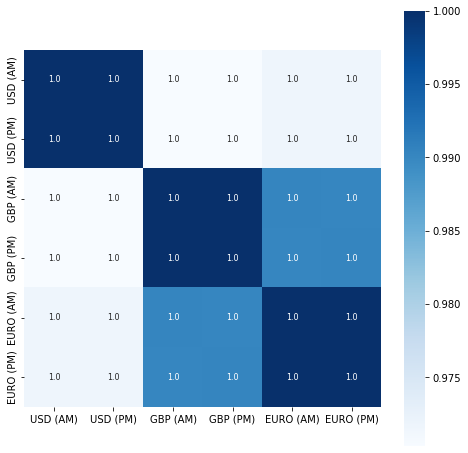

In [73]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [74]:
# correlation values of USD (AM)
print(correlation['USD (AM)'])


USD (AM)     1.000000
USD (PM)     0.999892
GBP (AM)     0.970442
GBP (PM)     0.970326
EURO (AM)    0.971761
EURO (PM)    0.971678
Name: USD (AM), dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


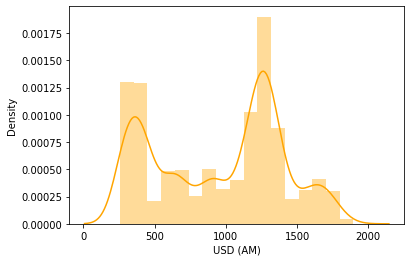

In [75]:
# checking the distribution of the USD (AM) Price
sns.distplot(data['USD (AM)'],color='orange')

# **Splitting the Features and Target**

In [76]:
X = data.drop(['Date','USD (AM)'],axis=1)
Y = data['USD (AM)']

In [77]:
print(X)

      USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
0       271.10   183.026   181.617    288.677    287.334
1       267.15   178.916   177.390    281.823    281.655
2       267.10   178.869   178.352    282.538    282.049
3       267.40   178.488   178.148    280.775    280.882
4       268.30   178.769   178.664    282.410    282.481
...        ...       ...       ...        ...        ...
4676   1532.95  1250.910  1247.510   1378.970   1380.880
4677   1537.15  1263.310  1258.770   1389.890   1387.430
4678   1540.20  1260.510  1262.960   1387.290   1392.030
4679   1528.40  1253.140  1251.150   1382.750   1383.510
4680   1525.95  1260.420  1265.010   1388.690   1391.510

[4681 rows x 5 columns]


In [78]:
print(Y)

0        272.80
1        269.00
2        268.75
3        268.00
4        268.60
         ...   
4676    1531.85
4677    1541.75
4678    1536.65
4679    1526.55
4680    1523.35
Name: USD (AM), Length: 4681, dtype: float64


# **Splitting into Training data and Test Data**

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# **Model Training:**
# **Random Forest Regressor**

In [80]:
regressor = RandomForestRegressor(n_estimators=100)

In [81]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# **Model Evaluation**

In [82]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [83]:
print(test_data_prediction)

[1161.3225 1212.559  1128.1445 1371.865  1200.3165 1651.7625 1152.252
  610.3535  545.0415 1275.6895  785.004  1356.097   624.958   385.4905
 1463.719   798.235   414.869   269.597   657.1195 1126.5555  890.5025
 1383.705   268.996   746.371   681.001   279.8825  298.9235  857.4275
  373.706   870.387   677.355   790.858   398.4925 1213.9595 1135.9905
  317.46   1337.721  1210.883   266.906  1307.811  1578.89   1099.0815
 1247.9175 1282.004   408.165  1335.896   297.8875  413.667   432.553
  421.6625  286.0495 1600.29    343.8115 1211.8525 1400.649   346.449
  468.3     387.2555  344.497  1223.5875 1284.986  1180.761  1450.1575
  921.8325  320.303  1772.375  1335.799  1327.415   360.448  1768.97
 1205.121  1297.31    555.4435  626.6875 1406.29   1499.7525  273.423
  989.755  1533.047  1233.0545 1407.595  1316.6665  433.528  1230.24
  673.7405  257.7535  306.9975  740.6725 1078.121  1098.8195 1272.7025
  661.916  1185.9145  258.708   922.508  1260.5585 1426.4175 1647.045
 1313.573  1291

In [84]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.999814768405733


# **Compare the Actual Values and Predicted Values in a Plot**

In [85]:
Y_test = list(Y_test)

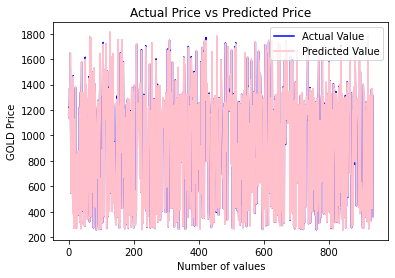

In [86]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price')
plt.legend()
plt.show()